# Introduction

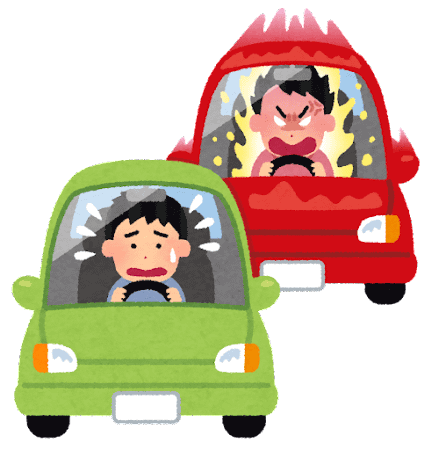

image from https://221616.com/shop/hyogo/nishinomiyashi/G00945/blog/twitter/G009451652596709748/


Road Rage is very serious problem in Japan.  The important thing is how we can avoid making other drivers get angry and avoid putting more quick tempered drivers into a blind fury.

According to the article, "What ticks off drivers in Japan? New survey reveals top 3 causes of road rage", 
* "getting passed"
* “slow driving”
* “changing lanes.”

are top 3 reasons why we make other drivers get angry.

It may be very convenient if we can get any alarm when we are in 'Slow' or 'Aggressive' situation while qwe are driving to avoid any trouble by making other drivwrs get angry...

As a first step, I tried to find classify model which can classify 'Normal' and 'Not Normal'('Slow' or 'Aggressive') while we are driving.
 
reference: https://japantoday.com/category/features/lifestyle/what-ticks-off-drivers-in-japan-new-survey-reveals-the-top-three-causes-of-road-rage

# Importing and Visualization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/driving-behavior/train_motion_data.csv
/kaggle/input/driving-behavior/test_motion_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv('/kaggle/input/driving-behavior/train_motion_data.csv')
df_test=pd.read_csv('/kaggle/input/driving-behavior/test_motion_data.csv')

In [4]:
df_train.tail()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791
3643,-0.402428,0.406218,-0.423009,-0.053603,-0.006720,0.001145,SLOW,3583791


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3084 non-null   float64
 1   AccY       3084 non-null   float64
 2   AccZ       3084 non-null   float64
 3   GyroX      3084 non-null   float64
 4   GyroY      3084 non-null   float64
 5   GyroZ      3084 non-null   float64
 6   Class      3084 non-null   object 
 7   Timestamp  3084 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 192.9+ KB


In [7]:
df_train.columns

Index(['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Class',
       'Timestamp'],
      dtype='object')

In [8]:
df_train['Class'].unique()

array(['NORMAL', 'AGGRESSIVE', 'SLOW'], dtype=object)

The purpose of this note book is to find the model by which we can classify 'Normal' or 'Not Normal'('Slow' or 'Aggressive'). So I replaced 'Class' by '0' or '1' for binary classification.

In [9]:
df_train['Class']=df_train['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[1, 0, 1])
df_test['Class']=df_test['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[1, 0, 1])

<AxesSubplot:xlabel='Class'>

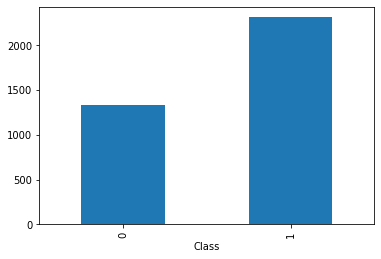

In [10]:
df_train.groupby('Class')['Class'].count().plot.bar()

Boxplot by class and data from sensors

<AxesSubplot:xlabel='Class', ylabel='AccX'>

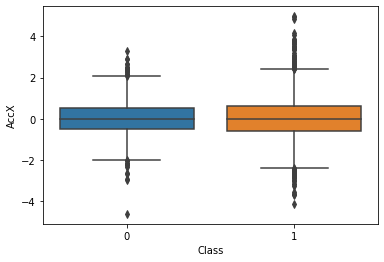

In [11]:
sns.boxplot(x='Class', y='AccX',data=df_train)

<AxesSubplot:xlabel='Class', ylabel='AccY'>

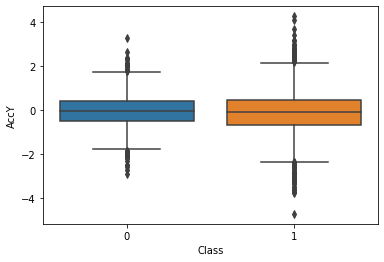

In [12]:
sns.boxplot(x='Class', y='AccY',data=df_train)

<AxesSubplot:xlabel='Class', ylabel='AccZ'>

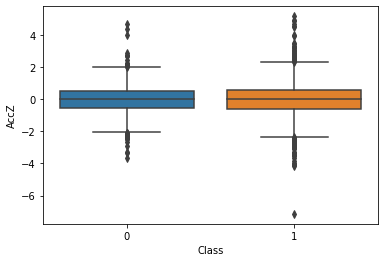

In [13]:
sns.boxplot(x='Class', y='AccZ',data=df_train)

<AxesSubplot:xlabel='Class', ylabel='GyroX'>

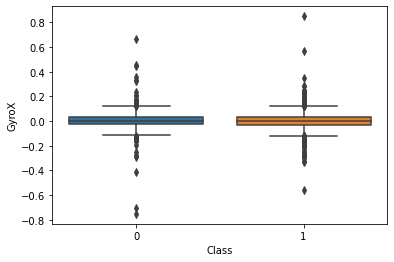

In [14]:
sns.boxplot(x='Class', y='GyroX',data=df_train)

<AxesSubplot:xlabel='Class', ylabel='GyroY'>

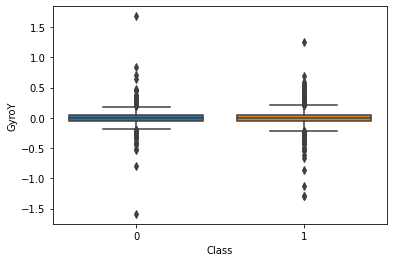

In [15]:
sns.boxplot(x='Class', y='GyroY',data=df_train)

<AxesSubplot:xlabel='Class', ylabel='GyroZ'>

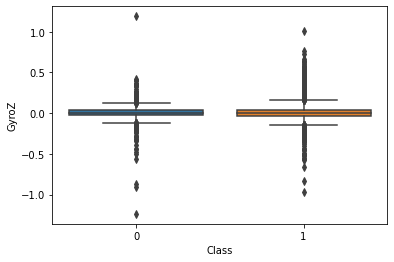

In [16]:
sns.boxplot(x='Class', y='GyroZ',data=df_train)

Time series of accelerometer data

<AxesSubplot:>

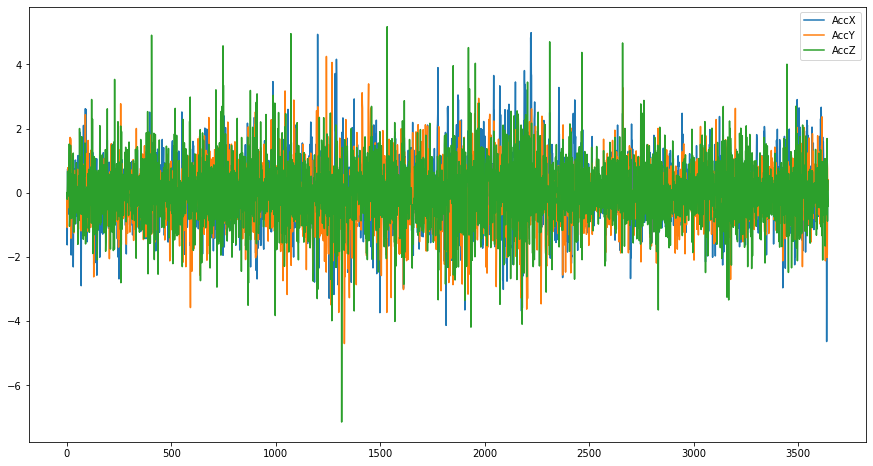

In [17]:
df_train.loc[:,['AccX','AccY','AccZ']].plot(figsize=(15,8))

Time series of Gyroscope data

<AxesSubplot:>

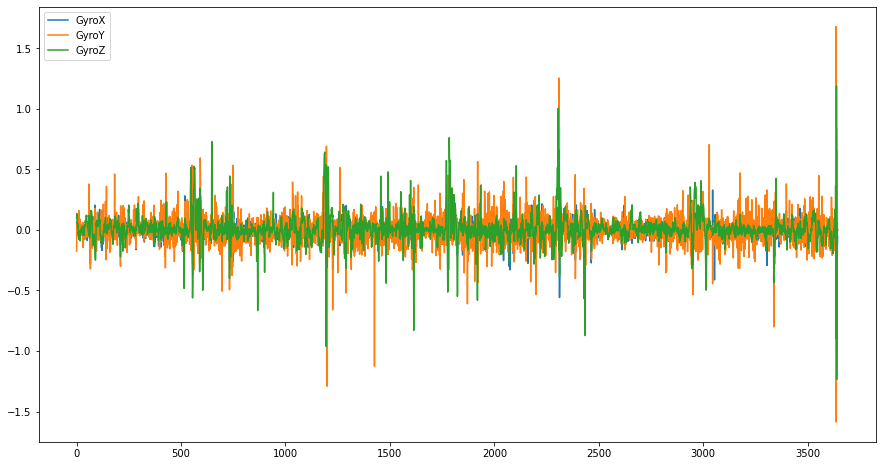

In [18]:
df_train.loc[:,['GyroX','GyroY','GyroZ']].plot(figsize=(15,8))

Pairplot of features

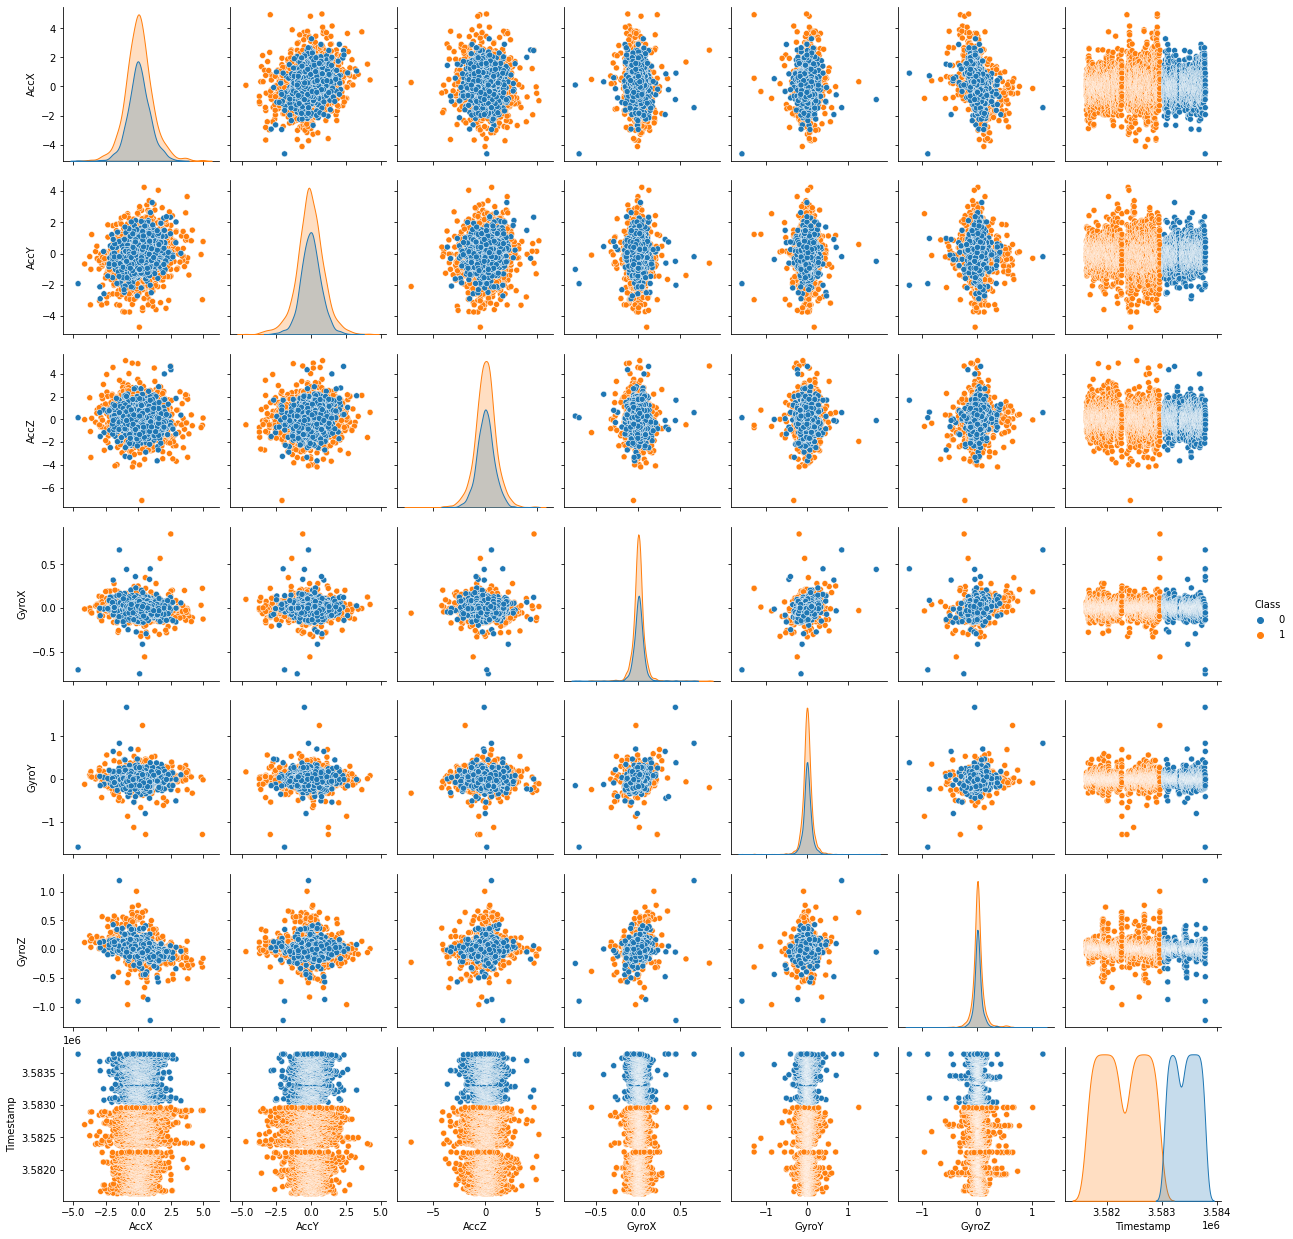

In [19]:
sns.pairplot(df_train, hue='Class')

Correlation heatmap

<AxesSubplot:>

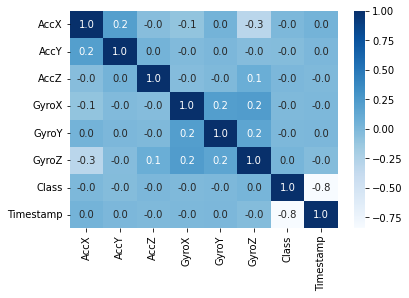

In [20]:
sns.heatmap(df_train.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f')

# Modeling by PyCaret

In [21]:
pip install pycaret --ignore-installed llvmlite numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.6/636.6 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.1/366.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.8/17.8 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.6/120.6 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [22]:
conda install -c numba llvmlite

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - llvmlite


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.6.15  |       ha878542_0         149 KB  conda-forge
    certifi-2022.6.15          |   py37h89c1867_0         155 KB  conda-forge
    conda-4.13.0               |   py37h89c1867_1         989 KB  conda-forge
    llvmlite-0.38.0            |   py37he1b5a44_0        28.2 MB  numba
    ------------------------------------------------------------


In [23]:
pip install numba --upgrade

  Using cached numba-0.55.2-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Attempting uninstall: numba
    Found existing installation: numba 0.55.1
    Uninstalling numba-0.55.1:
      Successfully uninstalled numba-0.55.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires gensim<4.0.0, but you have gensim 4.0.1 which is incompatible.
pycaret 2.3.10 requires imbalanced-learn==0.7.0, but you have imbalanced-learn 0.9.0 which is incompatible.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.55.2 which is incompatible.
pycaret 2.3.10 requires pyyaml<6.0.0, but you have pyyaml 6.0 which is incompatible.
pycaret 2.3.10 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.2 which is incompatible.
pycaret 2.3.10 requires scipy<=1.5.4, but you have scipy 1.7.3 which is incompatible.
pycaret 2.3.10 requires spa

In [24]:
from pycaret.classification import *

In [25]:
from sklearn.utils import shuffle
df_train = shuffle(df_train, random_state=42)
df_test = shuffle(df_test, random_state=42)

In [26]:
df_train=df_train.drop('Timestamp',axis=1)
df_test=df_test.drop('Timestamp',axis=1)

In [27]:
exp_class= setup(df_train, target = 'Class',silent=True,session_id=1)

,Description,Value
0,session_id,1
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3644, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [28]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6361,0.5167,0.9988,0.6363,0.7774,0.0012,0.0061,0.5930
dummy,Dummy Classifier,0.6361,0.5000,1.0000,0.6361,0.7776,0.0000,0.0000,0.0090
ridge,Ridge Classifier,0.6357,0.0000,0.9982,0.6362,0.7771,0.0004,0.0014,0.0110
lda,Linear Discriminant Analysis,0.6357,0.5167,0.9982,0.6362,0.7771,0.0004,0.0014,0.0120
svm,SVM - Linear Kernel,0.6333,0.0000,0.9932,0.6355,0.7750,-0.0031,-0.0095,0.0190
catboost,CatBoost Classifier,0.6286,0.5857,0.8804,0.6550,0.7509,0.0789,0.0936,2.2450
ada,Ada Boost Classifier,0.6208,0.5636,0.9186,0.6409,0.7550,0.0223,0.0311,0.0930
gbc,Gradient Boosting Classifier,0.6208,0.5719,0.9359,0.6375,0.7583,0.0074,0.0148,0.2070
lightgbm,Light Gradient Boosting Machine,0.6129,0.5703,0.8058,0.6605,0.7258,0.0888,0.0940,0.1700
rf,Random Forest Classifier,0.6094,0.5623,0.8354,0.6503,0.7312,0.0557,0.0619,0.4800


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6392,0.4994,0.9939,0.6403,0.7788,0.0060,0.0258
1,0.6392,0.5197,1.0000,0.6392,0.7799,0.0000,0.0000
2,0.6353,0.5102,1.0000,0.6353,0.7770,0.0000,0.0000
3,0.6392,0.5271,1.0000,0.6378,0.7788,0.0136,0.0828
4,0.6353,0.4910,1.0000,0.6353,0.7770,0.0000,0.0000
5,0.6353,0.5127,1.0000,0.6353,0.7770,0.0000,0.0000
6,0.6353,0.5402,1.0000,0.6353,0.7770,0.0000,0.0000
7,0.6314,0.5405,0.9938,0.6339,0.7740,-0.0078,-0.0475
8,0.6353,0.5488,1.0000,0.6353,0.7770,0.0000,0.0000


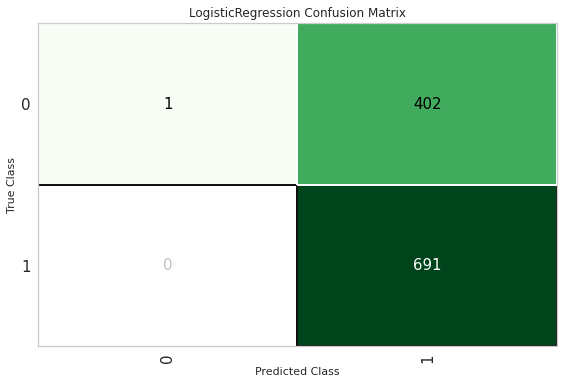

In [30]:
plot_model(lr, plot = 'confusion_matrix')

Baseline by Logistic Regression has 0.9939 recall. It semms to be nice because the important thing is that how we can find 'Not Normal' as much as we can. On the other hand, this case, recall 0.9939 may be too high, because we also heve too much false positive.

So I tried to tune threshold.

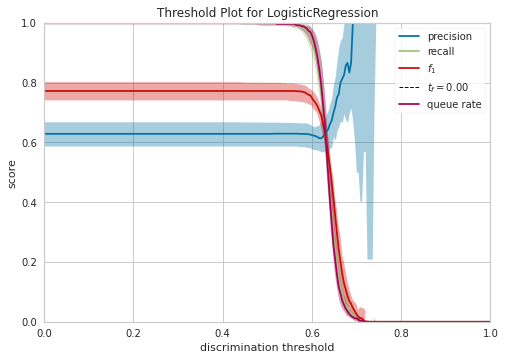

In [31]:
plot_model(lr, plot = 'threshold')

Around 0.6 threshold seems to be nice.

In [32]:
lr2 = create_model('lr',probability_threshold = 0.62)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5529,0.4994,0.8037,0.6150,0.6968,-0.0994,-0.1134
1,0.5412,0.5197,0.7546,0.6150,0.6777,-0.0903,-0.0962
2,0.5451,0.5102,0.7531,0.6162,0.6778,-0.0699,-0.0741
3,0.5725,0.5271,0.8086,0.6268,0.7062,-0.0337,-0.0376
4,0.5255,0.4910,0.7160,0.6073,0.6572,-0.0968,-0.1004
5,0.5451,0.5127,0.7654,0.6139,0.6813,-0.0807,-0.0869
6,0.5412,0.5402,0.7716,0.6098,0.6812,-0.0983,-0.1074
7,0.5804,0.5405,0.7963,0.6355,0.7068,0.0007,0.0007
8,0.6039,0.5488,0.8765,0.6368,0.7377,0.0065,0.0081


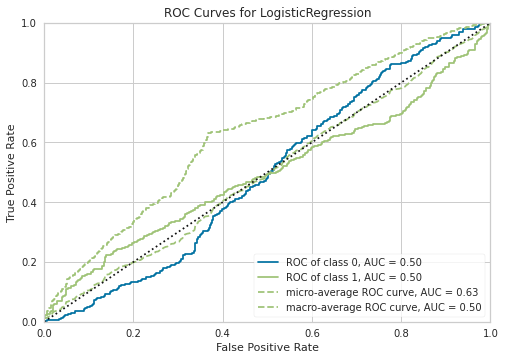

In [33]:
plot_model(lr2, plot = 'auc')

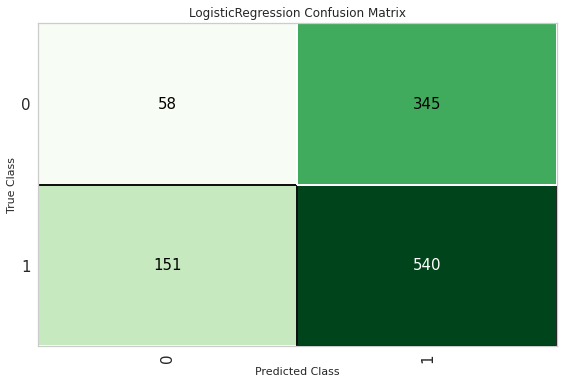

In [34]:
plot_model(lr2, plot = 'confusion_matrix')

I also tried Quadratic Discriminant Analysis.

In [35]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5490,0.5338,0.6687,0.6412,0.6547,0.0058,0.0058
1,0.5490,0.5505,0.6380,0.6500,0.6440,0.0291,0.0291
2,0.6118,0.6241,0.7284,0.6821,0.7045,0.1405,0.1412
3,0.6039,0.6195,0.6296,0.7133,0.6689,0.1809,0.1831
4,0.6039,0.6068,0.6790,0.6918,0.6854,0.1511,0.1511
5,0.6118,0.6270,0.7160,0.6864,0.7009,0.1485,0.1488
6,0.6235,0.6170,0.7099,0.7012,0.7055,0.1838,0.1839
7,0.6275,0.6010,0.7593,0.6872,0.7214,0.1635,0.1653
8,0.6078,0.6526,0.6235,0.7214,0.6689,0.1943,0.1974


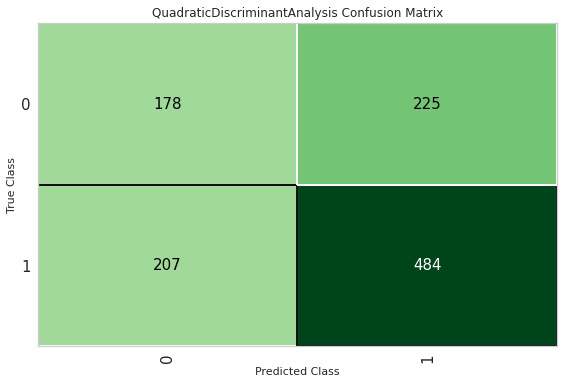

In [36]:
plot_model(qda, plot = 'confusion_matrix')

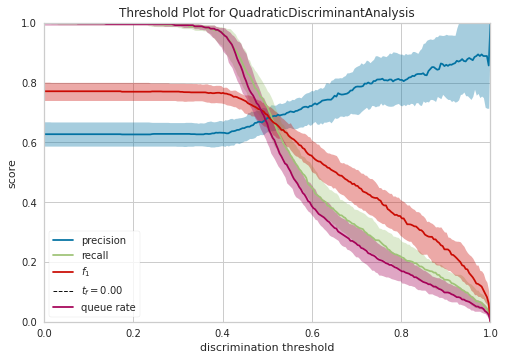

In [37]:
plot_model(qda, plot = 'threshold')

Around 0.5 threshold seems to be nice.

In [38]:
qda2 = create_model('qda',probability_threshold = 0.47)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5451,0.5338,0.7239,0.6243,0.6705,-0.0509,-0.0524
1,0.5765,0.5505,0.7301,0.6503,0.6879,0.0361,0.0367
2,0.6196,0.6241,0.8086,0.6650,0.7298,0.1076,0.1136
3,0.6235,0.6195,0.7160,0.6988,0.7073,0.1801,0.1802
4,0.6118,0.6068,0.7901,0.6632,0.7211,0.0982,0.1023
5,0.6078,0.6270,0.8025,0.6566,0.7222,0.0777,0.0824
6,0.6000,0.6170,0.7901,0.6531,0.7151,0.0639,0.0673
7,0.6157,0.6010,0.8086,0.6616,0.7278,0.0961,0.1019
8,0.6471,0.6526,0.7346,0.7169,0.7256,0.2313,0.2314


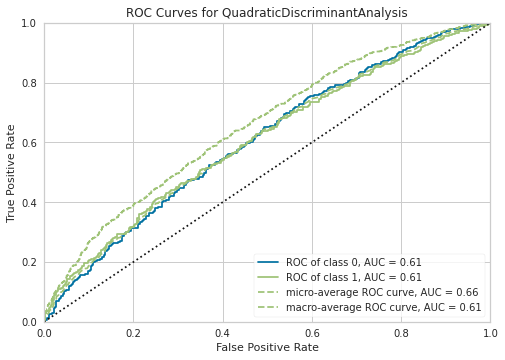

In [39]:
plot_model(qda2, plot = 'auc')

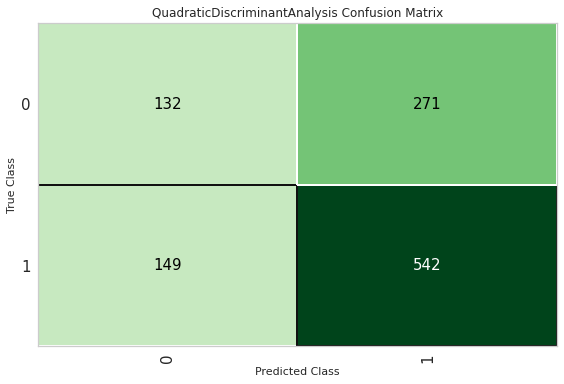

In [40]:
plot_model(qda2, plot = 'confusion_matrix')

Recall 0.77 to 0.78 seems to be fine to classify 'Not Normal' as much as we can and to avoid 'false positive' as much as we can.

In [41]:
final_qda = finalize_model(qda2)
unseen_predictions = predict_model(final_qda, data=df_test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.5966,0.6197,0.7648,0.6287,0.6901,0.1281,0.1332


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Label,Score
1505,0.634973,1.243932,-0.959725,-0.044593,0.044822,-0.113774,1,1,0.7719
2398,-0.193456,0.350371,-0.193524,0.044593,-0.015043,0.038332,0,0,0.5556
1814,-0.014167,0.048858,0.088998,0.043982,-0.007101,0.171500,0,1,0.5289
511,0.044712,-0.693067,-0.884560,0.004276,0.046044,-0.000764,1,1,0.4750
1565,0.686657,0.334636,-0.269495,0.073915,0.090637,0.005956,1,0,0.6237


Thank you !